In [1]:
from pybaseball import statcast
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Get Data

### League-Wide Data

In [2]:
data = statcast('2019-04-01', '2019-04-07')
data.head()

This is a large query, it may take a moment to complete
Completed sub-query from 2019-04-01 to 2019-04-06
Completed sub-query from 2019-04-07 to 2019-04-07


,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,355,FF,2019-04-07,96.0,3.3897,5.0500,Josh Hader,546991.0,623352.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,4.0,"Albert Almora grounds out, shortstop Orlando A...",R,R,L,MIL,CHC,X,6.0,ground_ball,2.0,2.0,2019.0,0.8699,1.2379,-0.2845,2.5541,NaN,NaN,NaN,2.0,9.0,Top,125.36,147.0,NaN,NaN,444489.0,NaN,190407_211451,-11.8755,-139.5487,-3.9453,14.1385,28.8402,-14.8980,3.4391,1.6196,3.0,86.4,-42.2,97.428,1852.0,6.972,567558.0,623352.0,444489.0,519346.0,541650.0,519058.0,606115.0,592325.0,456715.0,592885.0,53.5274,0.052,0.057,0.0,1.0,0.0,0.0,2.0,75.0,5.0,4-Seam Fastball,4.0,2.0,2.0,4.0,2.0,4.0,2.0,4.0,Strategic,Standard
1,363,FF,2019-04-07,94.9,3.4087,5.1617,Josh Hader,546991.0,623352.0,NaN,swinging_strike,NaN,NaN,NaN,NaN,12.0,NaN,R,R,L,MIL,CHC,S,NaN,NaN,2.0,1.0,2019.0,0.9348,1.2536,0.8582,4.0474,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,444489.0,NaN,190407_211416,-8.9237,-138.1720,-0.1540,14.1477,28.9413,-15.8483,3.7235,1.6761,NaN,NaN,NaN,96.336,1878.0,6.947,567558.0,623352.0,444489.0,519346.0,541650.0,519058.0,606115.0,592325.0,456715.0,592885.0,53.5529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,4.0,4-Seam Fastball,4.0,2.0,2.0,4.0,2.0,4.0,2.0,4.0,Standard,Standard
2,371,FF,2019-04-07,95.5,3.2392,5.1412,Josh Hader,546991.0,623352.0,NaN,ball,NaN,NaN,NaN,NaN,12.0,NaN,R,R,L,MIL,CHC,B,NaN,NaN,1.0,1.0,2019.0,0.7676,1.3669,0.9785,4.4111,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,444489.0,NaN,190407_211355,-7.7526,-139.0456,0.5686,11.7448,29.5658,-14.5050,3.7235,1.7043,NaN,NaN,NaN,96.379,1994.0,6.646,567558.0,623352.0,444489.0,519346.0,541650.0,519058.0,606115.0,592325.0,456715.0,592885.0,53.8535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,3.0,4-Seam Fastball,4.0,2.0,2.0,4.0,2.0,4.0,2.0,4.0,Standard,Standard
3,378,FF,2019-04-07,94.7,3.2370,5.1062,Josh Hader,546991.0,623352.0,NaN,foul,NaN,NaN,NaN,NaN,3.0,NaN,R,R,L,MIL,CHC,S,NaN,NaN,1.0,0.0,2019.0,0.6965,1.5859,0.7673,3.4252,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,444489.0,NaN,190407_211321,-8.0457,-137.7534,-2.2748,10.7238,31.0186,-11.5769,3.6097,1.5489,163.0,77.0,71.6,95.032,2056.0,6.533,567558.0,623352.0,444489.0,519346.0,541650.0,519058.0,606115.0,592325.0,456715.0,592885.0,53.9668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,2.0,4-Seam Fastball,4.0,2.0,2.0,4.0,2.0,4.0,2.0,4.0,Standard,Standard
4,385,FF,2019-04-07,95.4,3.2239,5.1182,Josh Hader,546991.0,623352.0,NaN,ball,NaN,NaN,NaN,NaN,13.0,NaN,R,R,L,MIL,CHC,B,NaN,NaN,0.0,0.0,2019.0,0.7189,1.5046,-0.2485,1.1694,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,444489.0,NaN,190407_211247,-10.8326,-138.4155,-8.2152,11.7182,29.6872,-10.9360,3.6950,1.7043,NaN,NaN,NaN,96.071,2149.0,6.747,567558.0,623352.0,444489.0,519346.0,541650.0,519058.0,606115.0,592325.0,456715.0,592885.0,53.7520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,1.0,4-Seam Fastball,4.0,2.0,2.0,4.0,2.0,4.0,2.0,4.0,Standard,Standard


### Individual Pitcher Data

In [3]:

from pybaseball import statcast_pitcher
from pybaseball import playerid_lookup

pid = playerid_lookup('berrios','jose')["key_mlbam"][0]
print(pid)
# get all available data
data = statcast_pitcher('2017-03-01', '2019-10-10', player_id = pid)
data.head()


Gathering player lookup table. This may take a moment.
621244
Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,CU,2019-10-04,83.1,-3.4447,5.3749,Jose Berrios,518934,621244,strikeout,called_strike,NaN,NaN,NaN,NaN,7.0,DJ LeMahieu called out on strikes.,D,R,R,NYY,MIN,S,2.0,NaN,0,2,2019,1.5243,-0.0725,-0.4447,1.5498,NaN,NaN,NaN,2,4,Bot,NaN,NaN,NaN,NaN,641598.0,NaN,191005_004359,3.9064,-120.8409,-2.1184,13.8701,24.1791,-32.6935,3.3189,1.6178,NaN,NaN,NaN,82.318,2317.0,5.863,599342,621244,641598.0,543068.0,650333.0,593934.0,593871.0,503556.0,596146.0,592696.0,54.6365,NaN,NaN,0.0,1.0,0.0,0.0,NaN,35,4,Curveball,3,2,3,2,2,3,3,2,Standard,Standard
1,FF,2019-10-04,93.7,-3.2863,5.6350,Jose Berrios,518934,621244,NaN,foul,NaN,NaN,NaN,NaN,1.0,NaN,D,R,R,NYY,MIN,S,NaN,NaN,0,2,2019,-0.9058,1.1199,-0.3632,3.2066,NaN,NaN,NaN,2,4,Bot,NaN,NaN,NaN,NaN,641598.0,NaN,191005_004327,9.5417,-136.1399,-3.0059,-13.3128,28.9827,-17.7937,3.3400,1.6200,NaN,NaN,NaN,93.759,2251.0,6.340,599342,621244,641598.0,543068.0,650333.0,593934.0,593871.0,503556.0,596146.0,592696.0,54.1595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,3,4-Seam Fastball,3,2,3,2,2,3,3,2,Standard,Standard
2,CU,2019-10-04,82.6,-3.5697,5.3764,Jose Berrios,518934,621244,NaN,foul,NaN,NaN,NaN,NaN,5.0,NaN,D,R,R,NYY,MIN,S,NaN,NaN,0,1,2019,1.1559,0.1934,-0.2504,2.2340,NaN,NaN,NaN,2,4,Bot,NaN,NaN,NaN,NaN,641598.0,NaN,191005_004303,5.2982,-120.0956,-0.9985,9.8857,23.3912,-30.4043,3.1875,1.6200,179.0,69.5,56.6,81.594,2368.0,5.668,599342,621244,641598.0,543068.0,650333.0,593934.0,593871.0,503556.0,596146.0,592696.0,54.8320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,2,Curveball,3,2,3,2,2,3,3,2,Standard,Standard
3,CU,2019-10-04,82.7,-3.3600,5.3776,Jose Berrios,518934,621244,NaN,called_strike,NaN,NaN,NaN,NaN,1.0,NaN,D,R,R,NYY,MIN,S,NaN,NaN,0,0,2019,1.4499,0.1681,-0.5332,3.0498,NaN,NaN,NaN,2,4,Bot,NaN,NaN,NaN,NaN,641598.0,NaN,191005_004244,3.6385,-120.2116,0.8993,12.9765,24.5135,-31.0240,3.2944,1.6200,NaN,NaN,NaN,81.657,2376.0,5.762,599342,621244,641598.0,543068.0,650333.0,593934.0,593871.0,503556.0,596146.0,592696.0,54.7378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,1,Curveball,3,2,3,2,2,3,3,2,Standard,Standard
4,FF,2019-10-04,94.6,-3.1906,5.6083,Jose Berrios,570482,621244,field_out,hit_into_play,NaN,NaN,NaN,NaN,11.0,Gio Urshela flies out to center fielder Max Ke...,D,R,R,NYY,MIN,X,8.0,fly_ball,1,2,2019,-1.1330,1.3742,-0.1568,3.8160,NaN,NaN,NaN,1,4,Bot,147.29,70.07,NaN,NaN,641598.0,NaN,191005_004210,10.4745,-137.4555,-2.0447,-16.7874,31.4002,-14.4607,3.4301,1.6200,322.0,92.3,31.3,94.687,2266.0,6.490,599342,621244,641598.0,543068.0,650333.0,593934.0,593871.0,503556.0,596146.0,592696.0,54.0094,0.122,0.179,0.0,1.0,0.0,0.0,3.0,34,4,4-Seam Fastball,3,2,3,2,2,3,3,2,Strategic,Standard


# Cleaning Data

In [4]:
data = data[["pitch_type", "bat_score", "fld_score", "on_3b", "on_2b", "on_1b", "outs_when_up", "inning", "inning_topbot", "pitch_number", "p_throws", "balls", "strikes", "stand", "batter", "release_speed", "description"]]
data.head()

,pitch_type,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,pitch_number,p_throws,balls,strikes,stand,batter,release_speed,description
0,CU,3,2,NaN,NaN,NaN,2,4,Bot,4,R,0,2,R,518934,83.1,called_strike
1,FF,3,2,NaN,NaN,NaN,2,4,Bot,3,R,0,2,R,518934,93.7,foul
2,CU,3,2,NaN,NaN,NaN,2,4,Bot,2,R,0,1,R,518934,82.6,foul
3,CU,3,2,NaN,NaN,NaN,2,4,Bot,1,R,0,0,R,518934,82.7,called_strike
4,FF,3,2,NaN,NaN,NaN,1,4,Bot,4,R,1,2,R,570482,94.6,hit_into_play


### Remove Some Uncommon Pitch Types

In [5]:
data = data[data.pitch_type != 'EP']
data = data[data.pitch_type != 'PO']

### Replace Player IDs with Boolean Values for Base Status

In [6]:
data[["on_3b", "on_2b", "on_1b"]] = data[["on_3b", "on_2b", "on_1b"]].replace(np.nan, 0)
data.loc[data.on_3b > 0, "on_3b"] = 1
data.loc[data.on_2b > 0, "on_2b"] = 1
data.loc[data.on_1b > 0, "on_1b"] = 1
data = data.dropna()
data.head()

,pitch_type,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,pitch_number,p_throws,balls,strikes,stand,batter,release_speed,description
0,CU,3,2,0.0,0.0,0.0,2,4,Bot,4,R,0,2,R,518934,83.1,called_strike
1,FF,3,2,0.0,0.0,0.0,2,4,Bot,3,R,0,2,R,518934,93.7,foul
2,CU,3,2,0.0,0.0,0.0,2,4,Bot,2,R,0,1,R,518934,82.6,foul
3,CU,3,2,0.0,0.0,0.0,2,4,Bot,1,R,0,0,R,518934,82.7,called_strike
4,FF,3,2,0.0,0.0,0.0,1,4,Bot,4,R,1,2,R,570482,94.6,hit_into_play


### Create Previous Pitch and Previous Pitch Release Speed Columns
This is where some accuracy could be gained in the future by splitting pitches out by at-bat and then training on the sequence of pitches, not just the previous pitch.

In [7]:
data["prev_pitch"] = data["pitch_type"].shift(-1)
data["prev_batter"] = data["batter"].shift(-1)
data["release_speed"] = data["release_speed"].shift(-1)
data["description"] = data["description"].shift(-1)

def filterAB(row):
    if row["batter"] == row["prev_batter"]:
        return row["prev_pitch"]
    else:
        return "NB"
    
def filterSpeed(row):
    if row["batter"] == row["prev_batter"]:
        return row["release_speed"]
    else:
        return 0
    
def filterDesc(row):
    if row["batter"] == row["prev_batter"]:
        return row["description"]
    else:
        return "NB"

data["prev_pitch"] = data.apply(lambda row: filterAB(row), axis = 1)
data["release_speed"] = data.apply(lambda row: filterSpeed(row), axis=1)
data["description"] = data.apply(lambda row: filterDesc(row), axis=1)
data

,pitch_type,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,pitch_number,p_throws,balls,strikes,stand,batter,release_speed,description,prev_pitch,prev_batter
0,CU,3,2,0.0,0.0,0.0,2,4,Bot,4,R,0,2,R,518934,93.7,foul,FF,518934.0
1,FF,3,2,0.0,0.0,0.0,2,4,Bot,3,R,0,2,R,518934,82.6,foul,CU,518934.0
2,CU,3,2,0.0,0.0,0.0,2,4,Bot,2,R,0,1,R,518934,82.7,called_strike,CU,518934.0
3,CU,3,2,0.0,0.0,0.0,2,4,Bot,1,R,0,0,R,518934,0.0,NB,NB,570482.0
4,FF,3,2,0.0,0.0,0.0,1,4,Bot,4,R,1,2,R,570482,95.0,foul,FF,570482.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8730,FT,0,0,0.0,0.0,0.0,1,1,Bot,1,R,0,0,L,596019,0.0,NB,NB,467793.0
8731,FF,0,0,0.0,0.0,0.0,0,1,Bot,4,R,1,2,L,467793,83.5,swinging_strike,CH,467793.0
8732,CH,0,0,0.0,0.0,0.0,0,1,Bot,3,R,1,1,L,467793,93.5,ball,FF,467793.0
8733,FF,0,0,0.0,0.0,0.0,0,1,Bot,2,R,0,1,L,467793,93.4,foul,FF,467793.0


### Drop Some Columns

In [8]:
data = data.drop("prev_batter", 1)
data = data.drop("batter", 1)

# EDA

In [9]:
data["pitch_type"].unique()

array(['CU', 'FF', 'CH', 'FT'], dtype=object)

In [10]:
data["pitch_type"].value_counts()

FF    2823
CU    2578
FT    2259
CH     988
Name: pitch_type, dtype: int64

Text(0.5, 1.0, 'Pitch Type Counts')

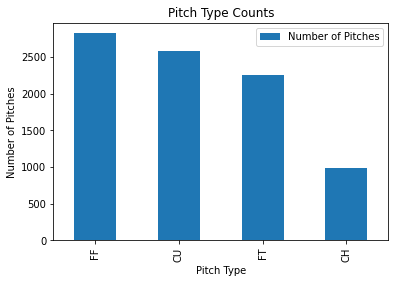

In [11]:
import matplotlib.pyplot as plt

df = pd.DataFrame({"Number of Pitches":data["pitch_type"].value_counts()})
plot = df.plot.bar()
plot.set_ylabel("Number of Pitches")
plot.set_xlabel("Pitch Type")
plot.set_title("Pitch Type Counts")

In [12]:
data["prev_pitch"].value_counts()

NB    2263
FF    2159
CU    1899
FT    1570
CH     757
Name: prev_pitch, dtype: int64

In [13]:
data = pd.concat([data,pd.get_dummies(data["prev_pitch"], prefix='prev_pitch')],axis=1)
data = pd.concat([data,pd.get_dummies(data["p_throws"], prefix='pitcher_throws')],axis=1)
data = pd.concat([data,pd.get_dummies(data["stand"], prefix='batter_stands')],axis=1)
data = pd.concat([data,pd.get_dummies(data["description"], prefix='prev_desc')],axis=1)
data = data.drop(['inning_topbot', 'p_throws', 'stand', "description", "prev_pitch"], axis = 1)
data.head(10)

,pitch_type,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,balls,strikes,release_speed,prev_pitch_CH,prev_pitch_CU,prev_pitch_FF,prev_pitch_FT,prev_pitch_NB,pitcher_throws_R,batter_stands_L,batter_stands_R,prev_desc_NB,prev_desc_ball,prev_desc_blocked_ball,prev_desc_called_strike,prev_desc_foul,prev_desc_foul_bunt,prev_desc_foul_tip,prev_desc_hit_into_play,prev_desc_missed_bunt,prev_desc_swinging_strike,prev_desc_swinging_strike_blocked
0,CU,3,2,0.0,0.0,0.0,2,4,4,0,2,93.7,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,FF,3,2,0.0,0.0,0.0,2,4,3,0,2,82.6,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,CU,3,2,0.0,0.0,0.0,2,4,2,0,1,82.7,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
3,CU,3,2,0.0,0.0,0.0,2,4,1,0,0,0.0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
4,FF,3,2,0.0,0.0,0.0,1,4,4,1,2,95.0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
5,FF,3,2,0.0,0.0,0.0,1,4,3,1,1,83.2,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
6,CH,3,2,0.0,0.0,0.0,1,4,2,1,0,83.2,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
7,CU,3,2,0.0,0.0,0.0,1,4,1,0,0,0.0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
8,CU,3,2,0.0,0.0,0.0,0,4,4,2,1,91.7,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
9,FT,3,2,0.0,0.0,0.0,0,4,3,2,0,93.9,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0


# Create Fastball/No Fastball Dataset

In [14]:
fbData = data.copy()

def filterFB(row):
    if row["pitch_type"] == 'FF' or row["pitch_type"] == 'FT' or row["pitch_type"] == 'FC':
        return 1
    else:
        return 0

fbData["pitch_type"] = fbData.apply(lambda row: filterFB(row), axis = 1)

fbData

,pitch_type,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,balls,strikes,release_speed,prev_pitch_CH,prev_pitch_CU,prev_pitch_FF,prev_pitch_FT,prev_pitch_NB,pitcher_throws_R,batter_stands_L,batter_stands_R,prev_desc_NB,prev_desc_ball,prev_desc_blocked_ball,prev_desc_called_strike,prev_desc_foul,prev_desc_foul_bunt,prev_desc_foul_tip,prev_desc_hit_into_play,prev_desc_missed_bunt,prev_desc_swinging_strike,prev_desc_swinging_strike_blocked
0,0,3,2,0.0,0.0,0.0,2,4,4,0,2,93.7,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,1,3,2,0.0,0.0,0.0,2,4,3,0,2,82.6,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,3,2,0.0,0.0,0.0,2,4,2,0,1,82.7,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,3,2,0.0,0.0,0.0,2,4,1,0,0,0.0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
4,1,3,2,0.0,0.0,0.0,1,4,4,1,2,95.0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8730,1,0,0,0.0,0.0,0.0,1,1,1,0,0,0.0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
8731,1,0,0,0.0,0.0,0.0,0,1,4,1,2,83.5,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
8732,0,0,0,0.0,0.0,0.0,0,1,3,1,1,93.5,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
8733,1,0,0,0.0,0.0,0.0,0,1,2,0,1,93.4,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [15]:
categoricalMask = data.dtypes==object
categoricalCols = data.columns[categoricalMask].tolist()
categoricalCols

['pitch_type']

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data[categoricalCols] = data[categoricalCols].apply(lambda col: le.fit_transform(col))
data = data.sample(frac=1).reset_index(drop=True)
fbData = fbData.sample(frac=1).reset_index(drop=True)

# Multi-Pitch Classification

In [17]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

features = data.columns.tolist()[1:]
X = data[features]
y = data["pitch_type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

## Re-Sample Classes

In [18]:
from imblearn.over_sampling import SMOTE
print(y_train.value_counts())
smote = SMOTE("all")
X_train, y_train = smote.fit_sample(X_train, y_train)
print(y_train.value_counts())

Using TensorFlow backend.
2    2243
1    2063
3    1794
0     818
Name: pitch_type, dtype: int64
3    2243
2    2243
1    2243
0    2243
Name: pitch_type, dtype: int64


## Models For Multi-Pitch Type Classification

### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
accuracy = dtree_model.score(X_test, y_test)
cm = confusion_matrix(y_test, dtree_predictions) 
print(cm)
print(accuracy)

[[ 78  18  31  43]
 [ 90 241 103  81]
 [146 153 177 104]
 [ 75 146  73 171]]
0.3855491329479769


### K-Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 8).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 

  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
print(cm)
print(accuracy)

[[ 71  37  27  35]
 [129 203 108  75]
 [134 143 185 118]
 [112 135  97 121]]
0.3352601156069364


### SVM

In [21]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 

print(cm)
print(accuracy)

[[ 66  28  54  22]
 [ 57 284 127  47]
 [ 83 213 210  74]
 [ 56 164 117 128]]
0.3976878612716763


### Neural Network

In [22]:
from keras.utils import to_categorical
num_classes=len(data["pitch_type"].unique())
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [23]:
from tensorflow import feature_column
from tensorflow.keras import layers
import tensorflow as tf


def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(len(features),), activation='relu', name='fc1'), #layer 1
    tf.keras.layers.Dense(8, activation='relu', name='fc2'), #layer 2
    tf.keras.layers.Dense(num_classes, activation='softmax', name='output')
  ])

  model.compile(optimizer='adam', 
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = get_compiled_model()
model.fit(X_train, y_train, batch_size=100, epochs=200)

 acc: 0.6711
Epoch 6/200
8972/8972 [==============================] - 0s 13us/sample - loss: 1.8894 - acc: 0.6727
Epoch 7/200
8972/8972 [==============================] - 0s 13us/sample - loss: 1.8877 - acc: 0.6743
Epoch 8/200
8972/8972 [==============================] - 0s 13us/sample - loss: 1.8869 - acc: 0.6768
Epoch 9/200
8972/8972 [==============================] - 0s 13us/sample - loss: 1.8858 - acc: 0.6753
Epoch 10/200
8972/8972 [==============================] - 0s 14us/sample - loss: 1.8857 - acc: 0.6748
Epoch 11/200
8972/8972 [==============================] - 0s 14us/sample - loss: 1.8843 - acc: 0.6749
Epoch 12/200
8972/8972 [==============================] - 0s 13us/sample - loss: 1.8835 - acc: 0.6757
Epoch 13/200
8972/8972 [==============================] - 0s 13us/sample - loss: 1.8580 - acc: 0.6779
Epoch 14/200
8972/8972 [==============================] - 0s 13us/sample - loss: 0.6952 - acc: 0.7267
Epoch 15/200
8972/8972 [==============================] - 0s 13us/sample 

In [24]:
results = model.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1730/1730 [==============================] - 0s 36us/sample - loss: 0.5265 - acc: 0.7493
Final test set loss: 0.526539
Final test set accuracy: 0.749277


In [25]:
pitches = le.inverse_transform(data["pitch_type"].unique())
pitches

array(['CU', 'FF', 'FT', 'CH'], dtype=object)

In [26]:
data["pitch_type"].unique()

array([1, 2, 3, 0])

In [27]:
some_data = data.sample(n=1)
some_data

,pitch_type,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,balls,strikes,release_speed,prev_pitch_CH,prev_pitch_CU,prev_pitch_FF,prev_pitch_FT,prev_pitch_NB,pitcher_throws_R,batter_stands_L,batter_stands_R,prev_desc_NB,prev_desc_ball,prev_desc_blocked_ball,prev_desc_called_strike,prev_desc_foul,prev_desc_foul_bunt,prev_desc_foul_tip,prev_desc_hit_into_play,prev_desc_missed_bunt,prev_desc_swinging_strike,prev_desc_swinging_strike_blocked
4612,2,5,5,0.0,0.0,1.0,2,6,5,2,2,82.0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0


In [28]:
ynew = model.predict_classes(some_data[features])
le.inverse_transform(ynew)

array(['CU'], dtype=object)

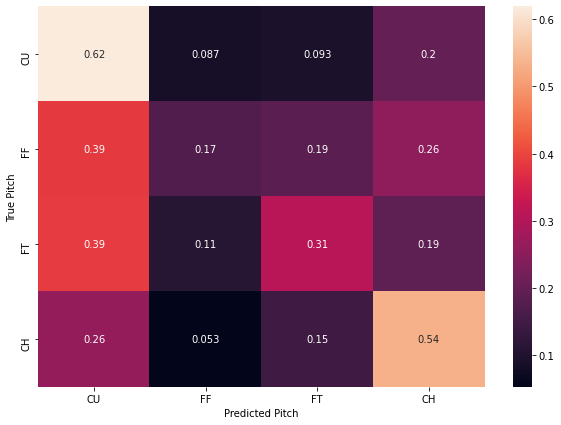

In [29]:
actual = [np.argmax(y, axis=None, out=None) for y in y_test]

y_pred = model.predict_classes(X_test)
y_true = actual

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=data["pitch_type"].unique())
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(cm, index = pitches,
                  columns = pitches)

plt.figure(figsize = (10,7))
cm = sn.heatmap(df_cm, annot=True)
cm.set_ylabel("True Pitch")
cm.set_xlabel("Predicted Pitch")
cm

# Fastball/No Fastball Classification

1 = Fastball, 0 = other pitch

In [30]:
fbData.head()

,pitch_type,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,balls,strikes,release_speed,prev_pitch_CH,prev_pitch_CU,prev_pitch_FF,prev_pitch_FT,prev_pitch_NB,pitcher_throws_R,batter_stands_L,batter_stands_R,prev_desc_NB,prev_desc_ball,prev_desc_blocked_ball,prev_desc_called_strike,prev_desc_foul,prev_desc_foul_bunt,prev_desc_foul_tip,prev_desc_hit_into_play,prev_desc_missed_bunt,prev_desc_swinging_strike,prev_desc_swinging_strike_blocked
0,1,0,0,0.0,0.0,0.0,1,4,3,1,1,85.2,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,1,0.0,0.0,0.0,0,2,3,2,0,93.1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
2,1,0,1,0.0,0.0,0.0,1,1,2,0,1,93.8,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,2,0.0,1.0,0.0,1,2,3,0,2,78.7,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0.0,0.0,0.0,2,4,1,0,0,0.0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


1    5082
0    3566
Name: pitch_type, dtype: int64


Text(0.5, 1.0, 'Pitch Type Counts')

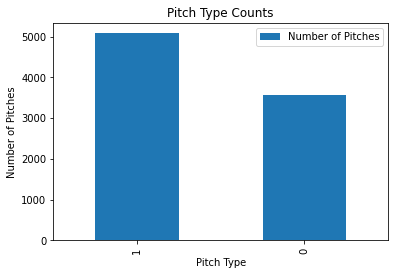

In [31]:
print(fbData["pitch_type"].value_counts())

df = pd.DataFrame({"Number of Pitches":fbData["pitch_type"].value_counts()})
plot = df.plot.bar()
plot.set_ylabel("Number of Pitches")
plot.set_xlabel("Pitch Type")
plot.set_title("Pitch Type Counts")

In [32]:
features = fbData.columns.tolist()[1:]
X = fbData[features]
y = fbData["pitch_type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

## Re-Sample Classes

In [33]:
y_train.value_counts()
smote = SMOTE("all")
X_train, y_train = smote.fit_sample(X_train, y_train)
y_train.value_counts()

1    4059
0    4059
Name: pitch_type, dtype: int64

## Models For Fastball/No-Fastball Pitch Classification

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 7).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
accuracy = dtree_model.score(X_test, y_test)
cm = confusion_matrix(y_test, dtree_predictions) 
print(cm)
print(accuracy)

[[440 267]
 [500 523]]
0.5566473988439307


### K-Nearest Neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 14).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 

  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
print(cm)
print(accuracy)

[[447 260]
 [561 462]]
0.5254335260115607


### SVM

In [36]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(accuracy)
print(cm)

0.5959537572254335
[[308 399]
 [300 723]]


### Neural Network

In [37]:
from keras.utils import to_categorical
num_classes=2
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [44]:
from tensorflow import feature_column
from tensorflow.keras import layers
import tensorflow as tf


def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(len(features),), activation='relu', name='fc1'), #layer 1
    tf.keras.layers.Dense(8, activation='relu', name='fc2'),
    tf.keras.layers.Dense(num_classes, activation='softmax', name='output')
  ])

  model.compile(optimizer='adam', 
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = get_compiled_model()
model.fit(X_train, y_train, batch_size=100, epochs=250)

118 [==============================] - 0s 14us/sample - loss: 0.6360 - acc: 0.6138
Epoch 58/250
8118/8118 [==============================] - 0s 15us/sample - loss: 0.6387 - acc: 0.6115
Epoch 59/250
8118/8118 [==============================] - 0s 14us/sample - loss: 0.6439 - acc: 0.6047
Epoch 60/250
8118/8118 [==============================] - 0s 14us/sample - loss: 0.6385 - acc: 0.6067
Epoch 61/250
8118/8118 [==============================] - 0s 14us/sample - loss: 0.6322 - acc: 0.6168
Epoch 62/250
8118/8118 [==============================] - 0s 13us/sample - loss: 0.6347 - acc: 0.6114
Epoch 63/250
8118/8118 [==============================] - 0s 14us/sample - loss: 0.6362 - acc: 0.6074
Epoch 64/250
8118/8118 [==============================] - 0s 14us/sample - loss: 0.6372 - acc: 0.6106
Epoch 65/250
8118/8118 [==============================] - 0s 15us/sample - loss: 0.6410 - acc: 0.6013
Epoch 66/250
8118/8118 [==============================] - 0s 14us/sample - loss: 0.6330 - acc: 0.6167

In [45]:
results = model.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1730/1730 [==============================] - 0s 39us/sample - loss: 0.6801 - acc: 0.5734
Final test set loss: 0.680123
Final test set accuracy: 0.573410


In [46]:
some_data = fbData.sample(n=1)
some_data

,pitch_type,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,balls,strikes,release_speed,prev_pitch_CH,prev_pitch_CU,prev_pitch_FF,prev_pitch_FT,prev_pitch_NB,pitcher_throws_R,batter_stands_L,batter_stands_R,prev_desc_NB,prev_desc_ball,prev_desc_blocked_ball,prev_desc_called_strike,prev_desc_foul,prev_desc_foul_bunt,prev_desc_foul_tip,prev_desc_hit_into_play,prev_desc_missed_bunt,prev_desc_swinging_strike,prev_desc_swinging_strike_blocked
46,1,0,6,0.0,0.0,0.0,1,3,4,1,2,84.7,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [47]:
ynew = model.predict_proba(some_data[features])
ynew

array([[0.28955287, 0.7104472 ]], dtype=float32)

In [48]:
model.predict_classes(some_data[features])

array([1])

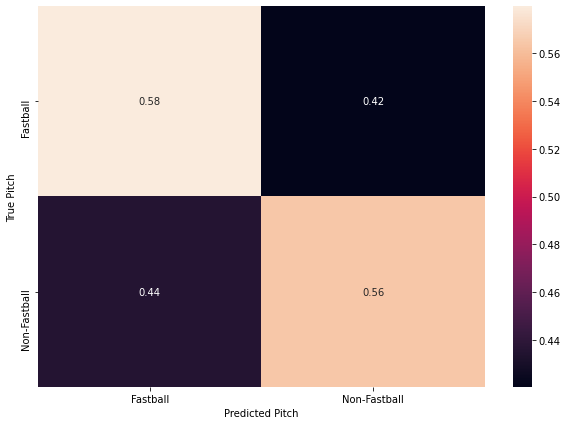

In [49]:
actual = [np.argmax(y, axis=None, out=None) for y in y_test]

y_pred = model.predict_classes(X_test)
y_true = actual

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = ["Fastball", "Non-Fastball"],
                  columns = ["Fastball", "Non-Fastball"])



plt.figure(figsize = (10,7))
cm = sn.heatmap(df_cm, annot=True)
cm.set_ylabel("True Pitch")
cm.set_xlabel("Predicted Pitch")
cm